# **Projeto Análise de dados**

* Base de dados: New York City Airbnb Open Data
* Acesso: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium

## **Respondendo as perguntas do CEO:**

In [2]:
# Leitura da base de dados
dados = pd.read_csv("AB_NYC_2019.csv")
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Qual o valor médio do aluguel na cidade de nova york?
valor_medio = dados['price'].mean()
print(f'O preço médio do aluguel na cidade de Nova York para uma noite é: US$ {valor_medio:,.2f}')

O preço médio do aluguel na cidade de Nova York para uma noite é: US$ 152.72


In [5]:
# Quais os nomes das regiões que existem na cidade de nova york?
regioes = list(dados['neighbourhood_group'].unique())
regioes.sort()
regioes_organizadas = '\n'.join(regioes)
print(f'Existem {len(regioes)} regiões na cidade de Nova York. São elas:\n',regioes_organizadas)

Existem 5 regiões na cidade de Nova York. São elas:
 Bronx
Brooklyn
Manhattan
Queens
Staten Island


In [6]:
#  Qual o valor do aluguel diário mais caro da cidade de Nova York?
local_mais_caro = dados.loc[dados['price'].idxmax(),'name']
print(f'- O lugar com aluguel mais caro é: {local_mais_caro}')
preco_mais_caro_aluguel = dados.loc[dados['price'].idxmax(),'price']
print(f'- Custando: US$ {preco_mais_caro_aluguel:,.2f}')

- O lugar com aluguel mais caro é: Furnished room in Astoria apartment
- Custando: US$ 10,000.00


###Produto Final

In [7]:
email = f'''Olá CEO, espero que esse e-mail o encontre bem.

Meu nome é Wandersen, sou Cientista de Dados do time de expansão.

Segue abaixo as respostas das perguntas de negócio solicitadas, referente a expansão de Nova York.

-> Qual o valor médio do aluguel na cidade de Nova York?
R: O valor médio do aluguel é de U$ {valor_medio:,.2f}

-> Quais os nomes das regiões que existem na cidade de Nova York?
R: Nomes das regiões:\n{regioes_organizadas};

-> Qual o valor do aluguel diário mais caro da cidade de Nova York?
R: O valor do aluguel diário mais caro é de U$ {preco_mais_caro_aluguel:,.2f}'''

print(email)

Olá CEO, espero que esse e-mail o encontre bem.

Meu nome é Wandersen, sou Cientista de Dados do time de expansão.

Segue abaixo as respostas das perguntas de negócio solicitadas, referente a expansão de Nova York.

-> Qual o valor médio do aluguel na cidade de Nova York?
R: O valor médio do aluguel é de U$ 152.72

-> Quais os nomes das regiões que existem na cidade de Nova York?
R: Nomes das regiões:
Bronx
Brooklyn
Manhattan
Queens
Staten Island;

-> Qual o valor do aluguel diário mais caro da cidade de Nova York?
R: O valor do aluguel diário mais caro é de U$ 10,000.00


In [8]:
# Preço médio do aluguéis por bairro:
for regiao in regioes:
  print(f'Dados da região do {regiao}\n')
  dados_regiao = dados[dados['neighbourhood_group'] == regiao]
  preco_medio = dados_regiao['price'].mean()
  print(f'O preço médio de alugueis em {regiao} é: US$ {preco_medio:,.2f}\n')

Dados da região do Bronx

O preço médio de alugueis em Bronx é: US$ 87.50

Dados da região do Brooklyn

O preço médio de alugueis em Brooklyn é: US$ 124.38

Dados da região do Manhattan

O preço médio de alugueis em Manhattan é: US$ 196.88

Dados da região do Queens

O preço médio de alugueis em Queens é: US$ 99.52

Dados da região do Staten Island

O preço médio de alugueis em Staten Island é: US$ 114.81



Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

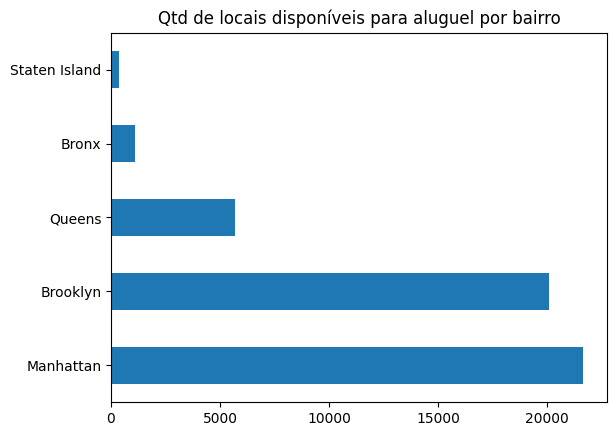

In [9]:
# Quantidade de lugares que você tem opção de alugar por bairro no Airbnb na cidade de Nova York
display(dados['neighbourhood_group'].value_counts());
dados['neighbourhood_group'].value_counts().plot(kind = 'barh', title = 'Qtd de locais disponíveis para aluguel por bairro');

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

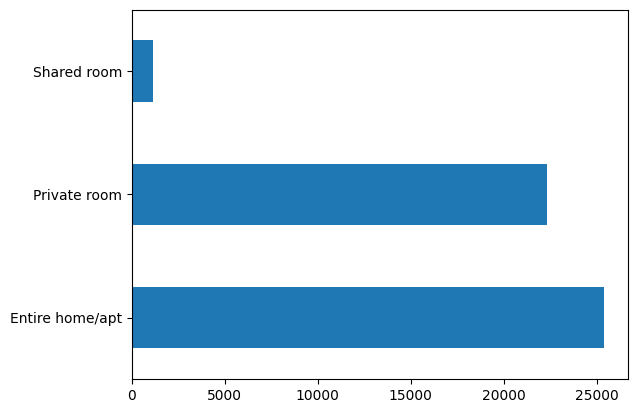

In [10]:
# Tipos de quartos que as pessoas mais costumam alugar
display(dados['room_type'].value_counts())
dados['room_type'].value_counts().plot(kind = 'barh');

In [11]:
# Tipos de acomodações e preços médios por região comparando com o preço médio geral por cada tipo de acomodação
tipos_acomodacoes = list(dados['room_type'].unique())

for acomodacao in tipos_acomodacoes:
  print(f'Tipo de acomodação: {acomodacao.upper()}\n')
  dados_acomodacao = dados[dados['room_type'] == acomodacao]

  for regiao in regioes:
    print(f'***** DADOS DA REGIÃO DO {regiao.upper()}*****\n')
    dados_regiao_acomodacao = dados_acomodacao[dados_acomodacao['neighbourhood_group'] == regiao]
    preco_medio_por_regiao = dados_regiao_acomodacao['price'].mean()
    print(f'O preço médio de alugueis em {regiao} para {acomodacao}: US$ {preco_medio_por_regiao:,.2f}\n')
    preco_medio_acomodacao = dados_acomodacao['price'].mean()
    print(f'O preço médio de alugueis por tipo {acomodacao} é: US$ {preco_medio_acomodacao:,.2f}\n')

Tipo de acomodação: PRIVATE ROOM

***** DADOS DA REGIÃO DO BRONX*****

O preço médio de alugueis em Bronx para Private room: US$ 66.79

O preço médio de alugueis por tipo Private room é: US$ 89.78

***** DADOS DA REGIÃO DO BROOKLYN*****

O preço médio de alugueis em Brooklyn para Private room: US$ 76.50

O preço médio de alugueis por tipo Private room é: US$ 89.78

***** DADOS DA REGIÃO DO MANHATTAN*****

O preço médio de alugueis em Manhattan para Private room: US$ 116.78

O preço médio de alugueis por tipo Private room é: US$ 89.78

***** DADOS DA REGIÃO DO QUEENS*****

O preço médio de alugueis em Queens para Private room: US$ 71.76

O preço médio de alugueis por tipo Private room é: US$ 89.78

***** DADOS DA REGIÃO DO STATEN ISLAND*****

O preço médio de alugueis em Staten Island para Private room: US$ 62.29

O preço médio de alugueis por tipo Private room é: US$ 89.78

Tipo de acomodação: ENTIRE HOME/APT

***** DADOS DA REGIÃO DO BRONX*****

O preço médio de alugueis em Bronx para

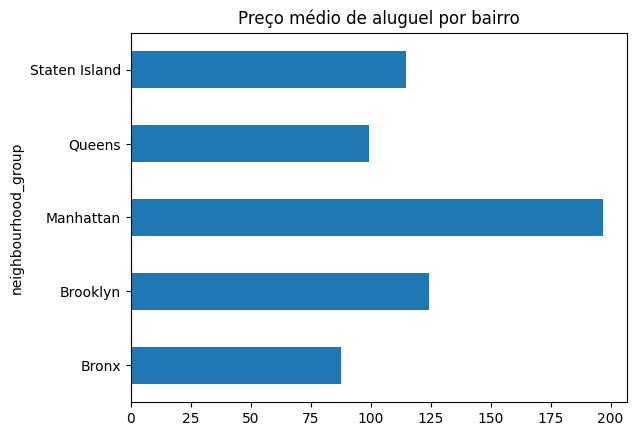

In [12]:
# Preço médio do aluguel por bairro
bairros = dados.groupby('neighbourhood_group')
bairros['price'].mean().round(2).plot(kind = 'barh', title = 'Preço médio de aluguel por bairro');

In [13]:
# Preço médio do aluguel por bairro
bairros = dados.groupby('neighbourhood_group')
bairros['price'].mean().round(2)

neighbourhood_group
Bronx             87.50
Brooklyn         124.38
Manhattan        196.88
Queens            99.52
Staten Island    114.81
Name: price, dtype: float64

In [14]:
display(dados.groupby(['neighbourhood_group','room_type'])['price'].mean().round(2))

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.51
                     Private room        66.79
                     Shared room         59.80
Brooklyn             Entire home/apt    178.33
                     Private room        76.50
                     Shared room         50.53
Manhattan            Entire home/apt    249.24
                     Private room       116.78
                     Shared room         88.98
Queens               Entire home/apt    147.05
                     Private room        71.76
                     Shared room         69.02
Staten Island        Entire home/apt    173.85
                     Private room        62.29
                     Shared room         57.44
Name: price, dtype: float64

In [15]:
# Informações do local que mais teve avaliações
local_mais_avaliado = dados.loc[dados['number_of_reviews'].idxmax(),['host_name','name', 'neighbourhood_group','room_type','number_of_reviews']]
print(f'- O lugar com mais reviews é: {local_mais_avaliado}')
preco_do_local_mais_avaliado = dados.loc[dados['number_of_reviews'].idxmax(),'price']
print(f'- Custando: US$ {preco_do_local_mais_avaliado:,.2f}')

- O lugar com mais reviews é: host_name                                 Dona
name                   Room near JFK Queen Bed
neighbourhood_group                     Queens
room_type                         Private room
number_of_reviews                          629
Name: 11759, dtype: object
- Custando: US$ 47.00


In [16]:
# Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?
categorias_de_imoveis = dados['room_type'].unique()
print('\n'.join(list(categorias_de_imoveis)))

Private room
Entire home/apt
Shared room


In [17]:
# Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?
hosts_unicos_cadastrados = len(dados['host_id'].unique())
print(f'Existem {hosts_unicos_cadastrados} Hosts únicos cadastrados.')

Existem 37457 Hosts únicos cadastrados.


In [18]:
# Como é a variação dos preços dos imóveis em NY?
desvio_padrao_precos = np.std(dados['price']).round(2)
print(f"A variação média dos preços é de U$ {desvio_padrao_precos:.2f}")

A variação média dos preços é de U$ 240.15


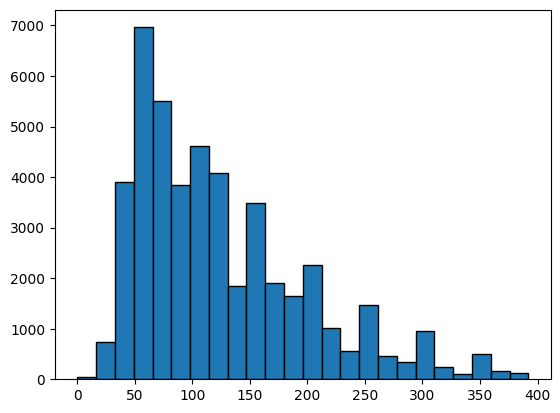

In [19]:
# Gráfico com a distribuição de imóveis pelo preço do aluguel;
# Existem mais imóveis baratos ou caros?
plt.hist(dados.loc[(dados['price'] >= (valor_medio - desvio_padrao_precos)) & (dados['price'] <= (valor_medio+desvio_padrao_precos)), 'price'], bins = 'doane', edgecolor = 'black');

In [20]:
# Desenhar um histograma para mostrar o número de apartamentos dentro de uma faixa de avaliação;
media_reviews = dados['number_of_reviews'].mean().round(2)
media_reviews

23.27

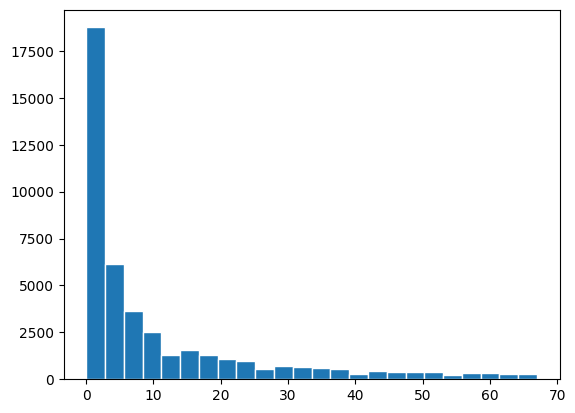

In [21]:
# Qual a distribuição do número de Reviews? Existem imóveis com muitos e outros com poucos reviews?
desvio_padrao_reviews = np.std(dados['number_of_reviews']).round(2)

plt.hist(dados.loc[(dados['number_of_reviews'] >= (media_reviews - desvio_padrao_reviews)) & (dados['number_of_reviews'] <= (media_reviews + desvio_padrao_reviews)), 'number_of_reviews'], bins = 'doane', edgecolor = 'white');

In [22]:
# 1.Qual é o intervalo de variação do preço dos alugueis dos imóveis?
intervalo_variacao = np.std(dados['price'])
media_precos = np.mean(dados['price'])

print(f'O intervalo de variação do preço dos alugueis é: U${media_precos:,.2f} +/- U${intervalo_variacao:,.2f}')

O intervalo de variação do preço dos alugueis é: U$152.72 +/- U$240.15


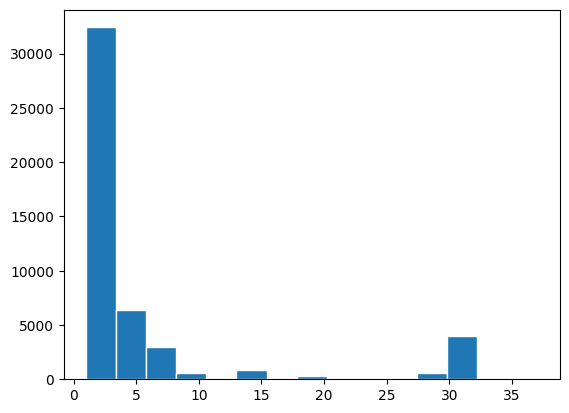

In [23]:
# 2.Qual a distribuição dos imóveis de acordo com o número mínimo de pernoites que podem ser agendado?
desvio_padrao_minimo_noites = np.std(dados['minimum_nights'])
media_minimo_noites = np.mean(dados['minimum_nights'])
plt.hist(dados.loc[(dados['minimum_nights'] >= (media_minimo_noites - desvio_padrao_minimo_noites)) & (dados['minimum_nights'] <= (media_minimo_noites + desvio_padrao_minimo_noites+10)), 'minimum_nights'], bins = 15, edgecolor = 'white');

In [24]:
# 3.Qual a média e a mediana de imóveis cadastrado por host (dono do imóvel)?

colunas = 'calculated_host_listings_count'
#Número médio de imóveis por host
media_imoveis_por_host = dados[colunas].mean()

#Mediana de imóveis por host
mediana_imoveis_por_host = np.median(dados[colunas])

print(f'Média e a mediana de imóveis cadastrado por host (dono do imóvel).\nMédia de imóveis cadastrados: {media_imoveis_por_host:,.2f}\nMediana: {mediana_imoveis_por_host}')

Média e a mediana de imóveis cadastrado por host (dono do imóvel).
Média de imóveis cadastrados: 7.14
Mediana: 1.0


### 4. Como você interpretaria o seguinte histograma?
R: Com o gráfico de histograma abaixo, podemos observar a distribuição do número de avaliações por mês dos imóveis cadastrados. É visível que a maior parte dos imóveis possui uma quantidade baixa de avaliações por mês. Mais de 20 mil imóveis, o que corresponde a cerca de 40% do total de imóveis cadastrados estão com menos ou apenas 1 avaliação por mês.

É possível observar também que a medida que o número de avaliações cresce, menos imóveis a gente possui na base de dados. Em que isso pode impactar? O número de avaliações baixo de um determinado imóvel pode ser um fator decisivo na hora dos clientes escolherem alugar um imóvel, visto que se supõe, os locais com mais avaliações é porque tiveram mais clientes alugando e conhecendo o imóvel, além disso, os clientes vão procurar os locais mais bem avaliados e que possuem mais avaliações para poderem escolher melhor.

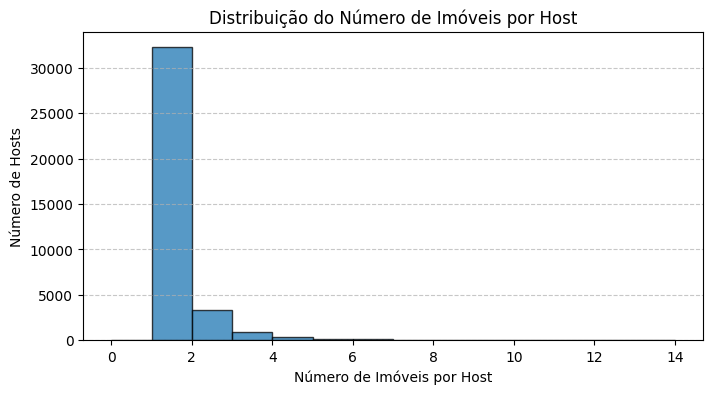

In [25]:
# 5. Como os imóveis estão distribuídos pelos donos ( host )?

#Número médio de imóveis por host
num_medio_i_host = dados.groupby('host_id')['id'].count().mean()

# Contagem de imóveis por host
listings_per_host = dados.groupby('host_id')['id'].count()

# Plotagem do histograma
plt.figure(figsize=(8, 4))
plt.hist(listings_per_host, bins=range(0, 15), alpha=0.75, edgecolor='k')
plt.xlabel('Número de Imóveis por Host')
plt.ylabel('Número de Hosts')
plt.title('Distribuição do Número de Imóveis por Host')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
# 6.Qual a data mais recente da última avaliação
dados['last_review'] = pd.to_datetime(dados['last_review'])
data_mais_recente = dados['last_review'].max()

print('A data mais recente da última avaliação foi {}'.format(str(data_mais_recente)[:-9]))

A data mais recente da última avaliação foi 2019-07-08


In [28]:
# 7. Qual o valor máximo de pernoites agendadas?
print(f"O valor máximo de pernoites agendadas é: {max(dados['minimum_nights'])}")

O valor máximo de pernoites agendadas é: 1250


### 8.  Como você interpretaria o seguinte valor do desvio padrão?
 " Preço médio da concorrência é de U$ 180 +/- U$$ 20 "

 R: O preço médio de alugueis é de 180 dólares, variando em média entre 180 dólares + 20 dólares, o que totaliza 200 dólares e 160 dólares(180 - 20). É o intervalo médio de preços dos alugueis, os preços variam entre 200 e 160 dólares, mas a média é em torno de 180 dólares.



In [29]:
# 9. Quantos nomes de donos de imóveis são únicos?
qtd_nomes_unicos = len(dados['host_name'].unique())

print(f'A quantidade de nomes únicos dos donos é: {qtd_nomes_unicos:.2f}')

A quantidade de nomes únicos dos donos é: 11453.00


### 10.Como você interpretaria o seguinte histograma

R: No gráfico é possível ver que existe uma concentração muito alta de imóveis próximos a 40.7 e 40.8 de latitude e poucos imóveis abaixo e acima desse intervalo, o que significa que existem muitos imóveis disponíveis para aluguel próximos uns dos outros.

In [30]:
#11. Quantos identificadores únicos existem na base de dados?
qtd_ids = len(dados['id'].unique())

hosts_unicos = len(dados['host_id'].unique())

print(f'Identificadores únicos, existem: {qtd_ids:,.0f} e hosts ids únicos, existem: {hosts_unicos:,.0f}')

Identificadores únicos, existem: 48,895 e hosts ids únicos, existem: 37,457


## Ciclo 03


In [31]:
# Quantidade de proprietários por região:

colunas = ['host_id', 'neighbourhood_group']
colunas_gby = 'neighbourhood_group'

dados.loc[:,colunas].groupby(colunas_gby).count().sort_values(by = 'host_id', ascending = False)

,host_id
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [32]:
# Preço médio do aluguel por região:
colunas = ['price', 'neighbourhood_group','room_type']
colunas_gby = ['neighbourhood_group', 'room_type']

dados.loc[:,colunas].groupby(colunas_gby).mean().round(2)#.sort_values(by = 'price', ascending = False)

price
neighbourhood_group room_type              
Bronx               Entire home/apt  127.51
                    Private room      66.79
                    Shared room       59.80
Brooklyn            Entire home/apt  178.33
                    Private room      76.50
                    Shared room       50.53
Manhattan           Entire home/apt  249.24
                    Private room     116.78
                    Shared room       88.98
Queens              Entire home/apt  147.05
                    Private room      71.76
                    Shared room       69.02
Staten Island       Entire home/apt  173.85
                    Private room      62.29
                    Shared room       57.44

In [33]:
# Número de avaliações média por tipo de quarto:
colunas = ['number_of_reviews', 'room_type']
colunas_gby = 'room_type'

dados.loc[:,colunas].groupby(colunas_gby).mean().round(2).sort_values(by = 'number_of_reviews', ascending = False)

,number_of_reviews
room_type,
Private room,24.11
Entire home/apt,22.84
Shared room,16.60


In [34]:
# Desvio padrão do preço do aluguel por região e tipo de quarto:
colunas = ['price','neighbourhood_group', 'room_type']
colunas_gby = ['neighbourhood_group','room_type']

dados.loc[:,colunas].groupby(colunas_gby).std().round(2)#.sort_values(by = 'price', ascending = False)

price
neighbourhood_group room_type              
Bronx               Entire home/apt   95.03
                    Private room     107.01
                    Shared room      101.80
Brooklyn            Entire home/apt  226.42
                    Private room     124.71
                    Shared room       53.44
Manhattan           Entire home/apt  331.83
                    Private room     190.19
                    Shared room       92.42
Queens              Entire home/apt  129.38
                    Private room     180.51
                    Shared room      171.00
Staten Island       Entire home/apt  394.60
                    Private room      36.14
                    Shared room       45.12

In [35]:
# 1. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?

colunas = ['price','neighbourhood_group']
colunas_gby = ['neighbourhood_group']

dados_grafico = dados.loc[:,colunas].groupby(colunas_gby).max().round(2).reset_index()#.sort_values(by = 'price', ascending = False)

px.bar(dados_grafico, x = 'neighbourhood_group', y = 'price');

In [36]:
# 2. Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro. Na cidade de Nova York?
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']
colunas_gby = ['neighbourhood_group']

dados_mapa = dados.loc[:,colunas].groupby(colunas_gby).max().reset_index()
dados_mapa

,neighbourhood_group,price,latitude,longitude
0,Bronx,2500,40.91306,-73.78158
1,Brooklyn,10000,40.73890,-73.85676
2,Manhattan,10000,40.87665,-73.90855
3,Queens,10000,40.79721,-73.71299
4,Staten Island,5000,40.64779,-74.06092


In [49]:

f = folium.Figure(width = 1024, height = 768)

map = folium.Map(
    location = [40.64779, -74.06092],
    zoom_start = 14,
    control_scale = True
)

for index, location_info in dados_mapa.iterrows():
  folium.Marker( [location_info['latitude'],
                  location_info['longitude']],
                 popup = location_info['neighbourhood_group']).add_to( map )

map

In [38]:
# 3. Conseguimos saber onde estão localizados os imóveis pelo seu tipo?

# Filtragem dos dados
colunas = ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price']

dados_mapa2 = dados.loc[:, colunas].sample(50)

# Criação da coluna color para preencher com as cores
dados_mapa2.loc[:, 'color'] = 'NA'

# Preenchendo as cores na coluna 'color'
linhas_private_room = dados_mapa2.loc[:, 'room_type'] == 'Private room'
dados_mapa2.loc[linhas_private_room ,'color'] = 'darkgreen'

linhas_entire_room = dados_mapa2.loc[:, 'room_type'] == 'Entire home/apt'
dados_mapa2.loc[linhas_entire_room ,'color'] = 'darkred'

linhas_shared_room = dados_mapa2.loc[:, 'room_type'] == 'Shared room'
dados_mapa2.loc[linhas_shared_room ,'color'] = 'purple'

In [39]:
# Desenhar o mapa

mapa2 = folium.Map(zoom_start = 14,
    control_scale = True  )

# Inserir os pinos
for index, location_info in dados_mapa2.iterrows():
  folium.Marker(
      [location_info['latitude'], location_info['longitude']],
      popup = location_info[['neighbourhood_group', 'room_type', 'price']],
      icon = folium.Icon(color = location_info['color']),
  ).add_to(mapa2)

mapa2

## Exercícios Ciclo 03

In [40]:
# 1.  Qual a média de preço por região?

colunas = ['price', 'neighbourhood_group']
colunas_gby = ['neighbourhood_group']

dados.loc[:, colunas].groupby(colunas_gby).mean().round(2).reset_index().sort_values(by = 'price', ascending = False)

,neighbourhood_group,price
2,Manhattan,196.88
1,Brooklyn,124.38
4,Staten Island,114.81
3,Queens,99.52
0,Bronx,87.50


In [41]:
# 2. Qual o maior valor do aluguel por bairro e por tipo de quarto?

colunas = ['price', 'neighbourhood_group', 'room_type']
colunas_gby = ['neighbourhood_group','room_type']

dados.loc[:, colunas].groupby(colunas_gby).max().round(2).reset_index().sort_values(by = 'price', ascending = False)

,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


In [42]:
# 3. Qual o menor valor de latitude por região?

colunas = ['latitude', 'neighbourhood_group']
colunas_gby = ['neighbourhood_group']

dados.loc[:, colunas].groupby(colunas_gby).min().reset_index()#.sort_values(by = 'price', ascending = False)

,neighbourhood_group,latitude
0,Bronx,40.80011
1,Brooklyn,40.57115
2,Manhattan,40.70234
3,Queens,40.56546
4,Staten Island,40.49979


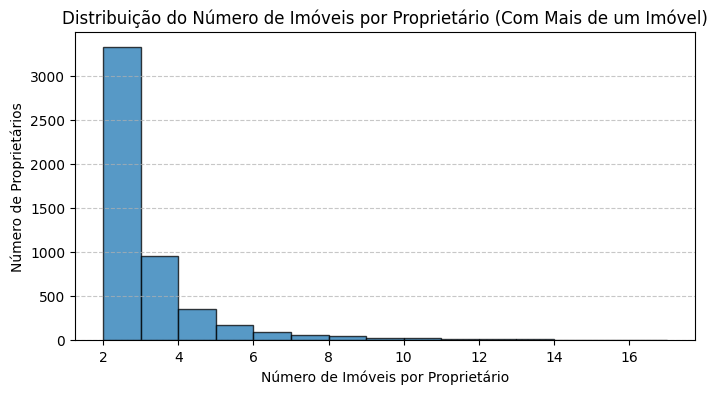

In [43]:
# 4.  Faça um histograma somente com os proprietários que possuem mais de um imóvel listado na base de dados de NY.

# Calcule o número de imóveis listados por cada proprietário (host)
num_imoveis_por_host = dados['host_id'].value_counts()

# Filtre os proprietários que possuem mais de um imóvel
hosts_com_mais_de_um_imovel = num_imoveis_por_host[num_imoveis_por_host > 1]

# Crie um histograma com o número de imóveis por proprietário
plt.figure(figsize=(8, 4))
plt.hist(hosts_com_mais_de_um_imovel, bins=range(2,18), alpha=0.75, edgecolor='k')
plt.xlabel('Número de Imóveis por Proprietário')
plt.ylabel('Número de Proprietários')
plt.title('Distribuição do Número de Imóveis por Proprietário (Com Mais de um Imóvel)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
# 5. Desenhe um mapa com os imóveis mais baratos por região.

colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']
colunas_gby = ['neighbourhood_group']

mapa_barato = dados.loc[:, colunas].groupby(colunas_gby).min().reset_index()
mapa_barato

,neighbourhood_group,price,latitude,longitude
0,Bronx,0,40.80011,-73.93190
1,Brooklyn,0,40.57115,-74.03942
2,Manhattan,0,40.70234,-74.01851
3,Queens,10,40.56546,-73.95927
4,Staten Island,13,40.49979,-74.24442


In [48]:
mapa3 = folium.Map(
    zoom_start = 14,
    control_scale = True
)

for index, location_info in mapa_barato.iterrows():
  folium.Marker( [location_info['latitude'],
                  location_info['longitude']],
                 popup = location_info[['neighbourhood_group', 'price']]).add_to( mapa3 )

mapa3

In [62]:
# 6. Desenhe um mapa com os imóveis que possuem o maior número de avaliações por região

colunas = ['number_of_reviews', 'neighbourhood_group','latitude','longitude']
colunas_gby = ['neighbourhood_group']

dados_mapa4 = dados.loc[:,colunas].groupby(colunas_gby).max().reset_index()

mapa4 = folium.Map(zoom_start = 14 ,control_scale = True)

for index, location_info in dados_mapa4.iterrows():
  folium.Marker(
      [location_info['latitude'], location_info['longitude']],
      popup = location_info[['number_of_reviews', 'neighbourhood_group']],
      ).add_to(mapa4)

mapa4

In [66]:
# 7. Desenhe um mapa somente com 100 imóveis do tipo “private room” escolhidos aleatoriamente

colunas = ['room_type', 'latitude', 'longitude', 'price', 'neighbourhood_group']

dados_mapa5 = dados.loc[dados['room_type'] == 'Private room',colunas].sample(100)

mapa5 = folium.Map(zoom_start = 14, control_scale = True)

for index, location_info in dados_mapa5.iterrows():
  folium.Marker([location_info['latitude'], location_info['longitude']],
                popup = location_info[['price','neighbourhood_group']]).add_to(mapa5)

mapa5

In [74]:
# 8. Desenhe um mapa somente com 100 imóveis do tipo “shared room” escolhidos aleatoriamente

colunas = ['room_type', 'latitude', 'longitude', 'price', 'neighbourhood_group']

dados_mapa6 = dados.loc[dados['room_type'] == 'Shared room',colunas].sample(100)

mapa6 = folium.Map(zoom_start = 14, control_scale = True)

for index, location_info in dados_mapa6.iterrows():
  folium.Marker([location_info['latitude'], location_info['longitude']],
                popup = location_info[['price','neighbourhood_group']]).add_to(mapa6)

mapa6